In [ ]:
!pip install matplotlib opencv-python


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving image.jpg to image.jpg


Task 1: Reduce number of intensity levels (quantization)

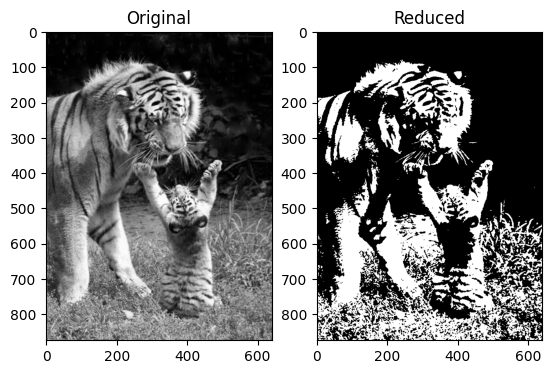

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def reduce_intensity_levels(image_path, levels):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    factor = 256 // levels
    reduced_img = (img // factor) * factor
    return img, reduced_img


original, reduced = reduce_intensity_levels("image.jpg", 2)
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(original, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Reduced")
plt.imshow(reduced, cmap='gray')
plt.show()


 Task 2: Spatial averaging with 3x3, 10x10, 20x20 kernels

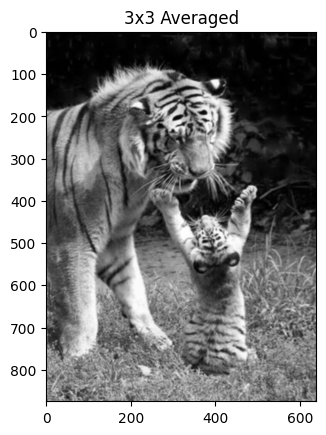

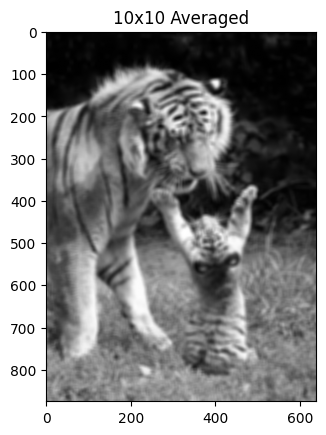

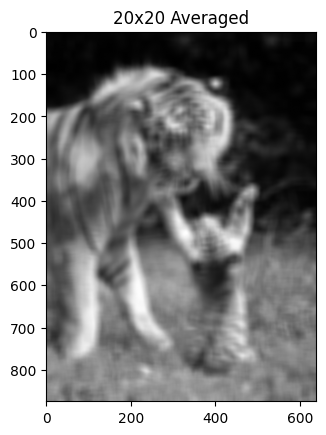

In [ ]:
def average_blur(image_path, ksize):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred = cv2.blur(img, (ksize, ksize))
    return img, blurred

for k in [3, 10, 20]:
    original, blurred = average_blur("image.jpg", k)
    plt.figure()
    plt.title(f"{k}x{k} Averaged")
    plt.imshow(blurred, cmap='gray')


Task 3: Rotate an image by 45° and 90°

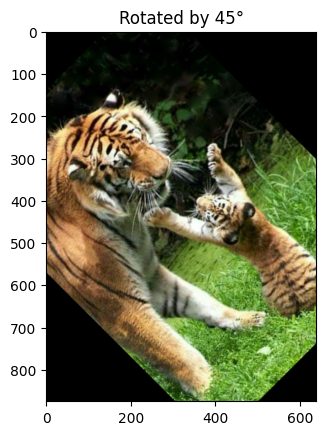

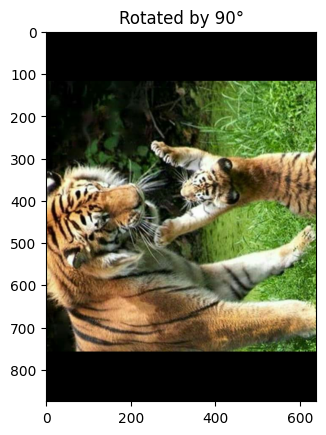

In [ ]:
def rotate_image(image_path, angle):
    img = cv2.imread(image_path)
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, matrix, (w, h))
    return img, rotated

for angle in [45, 90]:
    original, rotated = rotate_image("image.jpg", angle)
    plt.figure()
    plt.title(f"Rotated by {angle}°")
    plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))


 Task 4: Downsampling by averaging 3x3, 5x5, 7x7 blocks

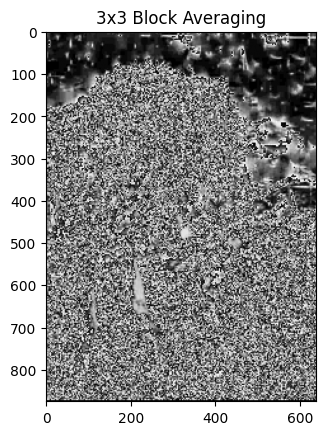

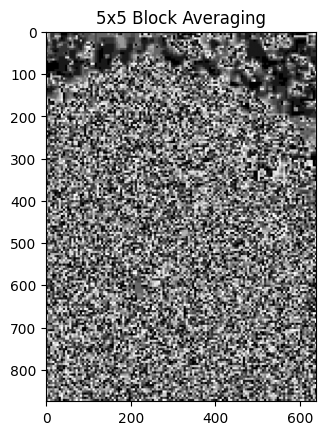

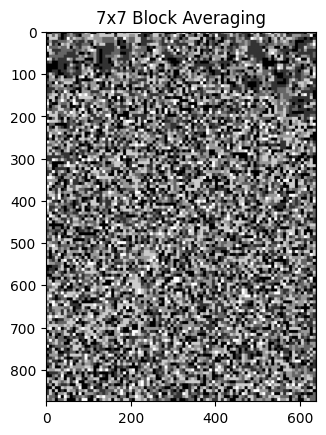

In [ ]:
def block_average(img_path, block_size):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    h, w = img.shape
    out = np.zeros_like(img)

    for i in range(0, h - block_size + 1, block_size):
        for j in range(0, w - block_size + 1, block_size):
            block = img[i:i+block_size, j:j+block_size]
            avg = np.mean(block, dtype=np.uint8)
            out[i:i+block_size, j:j+block_size] = avg
    return img, out

for b in [3, 5, 7]:
    original, result = block_average("image.jpg", b)
    plt.figure()
    plt.title(f"{b}x{b} Block Averaging")
    plt.imshow(result, cmap='gray')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cv2.imwrite("reduced_image.jpg", reduced)


True